## 데이터 분석 프로젝트.(20점/40점)
 
1) 주제 선정 - 서울의 미세먼지에 대하여 안좋은 날의 특징 및 상태를 분석한다.  

2) 데이터 수집 - kaggle에서 제공하는 2017 - 2019 서울 측정소의 데이터를 다운로드.  

3) 데이터 처리 - 데이터의 양이 매우 커 지역이나 시간을 특정할 필요가 있다.      
 3 - 1) 종로의 자료만 불러온다.  
 3 - 2) 측정이 잘못된 오류값들을 소거한다.  
 3 - 3) 분석에 필요없는 열들을 소거한다.(위치 데이터)  
 
4) 데이터 분석 - 표본에 대하여, 예측보다는 단순 EDA를 통해 특징을 추출한다.  
 4 - 1) 월별 평균을 시각화 한다.  
 4 - 2) 일별 평균을 통해서 plotting 해본다.  
 4 - 3) 다양한 종류의 자료 중 상관관계를 분석해본다.
 4 - 4) PM10이 높은 날을 특정한다.
    
5) 정보도출  
 5 - 1) 년 중 안좋은 월과 시간대를 파악한다.   
 5 - 2) 칼럼별 상관관계를 통해 미세먼지간의 상관을 파악한다.  
 5 - 3) 년 중 안좋은 날을 살펴본다.
 
6) 결론


### 데이터 처리

In [1]:
# ROAD PACKAGES
import pandas as pd # table을 다루는 package로 분석시 주로 이용한다.
import numpy as np
import matplotlib.pyplot as plt # 시각화 package
import seaborn as sns # 시각화 package
import os
import warnings
warnings.filterwarnings(action='ignore')


# os 설정
os.chdir(r"C:\Users\heon1\Desktop\576393_1056900_bundle_archive\AirPollutionSeoul")
os.getcwd()
ch = os.getcwd()
print(ch)

C:\Users\heon1\Desktop\576393_1056900_bundle_archive\AirPollutionSeoul


In [2]:
# data road
pollution = pd.read_csv(ch + r"\Measurement_summary.csv", encoding = 'UTF-8') # 지역별 세부데이터
pol_rule = pd.read_csv(ch + r"\Original Data\Measurement_item_info.csv", encoding = 'UTF-8') # 오염도 기준 데이터

In [3]:
pol_rule # 각 수치에 따른 오염도 측정 기준이다.

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [4]:
pollution.head()# 각 지역의 시간별 대기 상태 측정

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [5]:
print("data 크기 :", pollution.shape,"\n") # 데이터 크기
print("data columns 종류 :",pollution.columns,"\n") # 행 종류
print("data na 수 :\n",pollution.isna().sum(),"\n") 

print(pollution.dtypes) # 행 종류


data 크기 : (647511, 11) 

data columns 종류 : Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object') 

data na 수 :
 Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64 

Measurement date     object
Station code          int64
Address              object
Latitude            float64
Longitude           float64
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
dtype: object


엑셀로 데이터를 보았을떄 기간은 2017 - 2019년이며, 시간별로 측정하였다.
 1. station이 많기 때문에 종로라는 한가지 지역만을 측정할 것이다. (종로 station code = 101)  
 종로 선택 이유 : 서울의 중심지이므로 대표성을 뛸 수 있다고 생각했다. 그리고 본인 집이랑 가까워서 임의선택하였다.
 2. 이에 따라 station code와 address, latitude, longtitue와 같이 지역 측정 정보는 삭제한다.

In [6]:
print("station 수 :",len(pollution['Station code'].unique()))

station 수 : 25


In [7]:
df = pollution.loc[pollution['Station code'] == 101] # jongro구만 가져온다.
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [8]:
df.describe() # 결과에 따르면 -1이 있다. 이는 불가능한 수치로 소거할 필요가 있다.

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,25905.0,2.590500e+04,2.590500e+04,25905.000000,25905.000000,25905.000000,25905.000000,25905.000000,25905.000000
mean,101.0,3.757202e+01,1.270050e+02,0.003300,0.030516,0.023518,0.583764,37.965605,22.850454
std,0.0,2.134512e-11,5.050635e-11,0.033352,0.037743,0.038710,0.480945,27.427990,20.005210
min,101.0,3.757202e+01,1.270050e+02,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,101.0,3.757202e+01,1.270050e+02,0.003000,0.019000,0.009000,0.400000,21.000000,11.000000
50%,101.0,3.757202e+01,1.270050e+02,0.004000,0.028000,0.022000,0.500000,32.000000,18.000000
75%,101.0,3.757202e+01,1.270050e+02,0.005000,0.042000,0.035000,0.700000,48.000000,29.000000
max,101.0,3.757202e+01,1.270050e+02,0.406000,0.109000,0.325000,40.000000,516.000000,513.000000


In [9]:
del_table = df.loc[(df['SO2']<0) | (df['NO2']<0) | (df['CO']<0) | (df['O3']<0) | (df['PM10']<0)| (df['PM2.5']<0)]
print("Total number of to_drop records is {}".format(del_table.shape[0]))
del_table.head()

Total number of to_drop records is 43


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
854,2017-02-05 14:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
855,2017-02-05 15:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
856,2017-02-05 16:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
857,2017-02-05 17:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
858,2017-02-05 18:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


다행스럽게도, 같은 날 -1.0이 찍힌 것을 보아, 이 당일 관측소 에러로 인해 이러한 결과가 발생한듯하다.

In [10]:
df.drop(del_table.index, axis=0, inplace=True) # 43개 행 삭제한다.
df.head(5)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [11]:
# 위치정보를 가진 칼럼을 삭제한다.
del_col = ['Station code', 'Address', 'Latitude', 'Longitude']
df.drop(del_col, axis=1, inplace=True)
df

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...
25900,2019-12-31 19:00,0.003,0.026,0.014,0.5,26.0,19.0
25901,2019-12-31 20:00,0.003,0.024,0.014,0.4,27.0,19.0
25902,2019-12-31 21:00,0.003,0.014,0.021,0.4,23.0,18.0
25903,2019-12-31 22:00,0.003,0.022,0.014,0.5,20.0,19.0


## 시간에 따른 대기상태 시각화

In [12]:
# 일별 시간별을 구분하기위해 split함수로 날짜와 시간을 나누어준다.
date_time = df['Measurement date'].str.split(" ", n=1, expand=True)
date_time.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [13]:
df['date'] = date_time[0] # df에 새로운 칼럼으로 추가
df['time'] = date_time[1] 
df.drop(['Measurement date'], axis=1, inplace=True)
df.head()

,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


### 일별 시각화

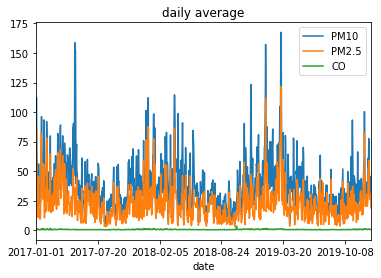

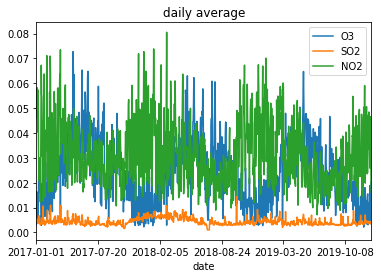

In [15]:
# groupby를 통해 일별 평균 시각화
df_day = df.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 
                                                             'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_day.plot(x='date', y=['PM10','PM2.5','CO'], title = "daily average") # 양수값 측정치를 가진다. 그러므로 나눠서 시각화
df_day.plot(x='date', y=['O3','SO2','NO2'], title = "daily average") # 소수점 측정치를 가진다.

In [16]:
pol_rule # 각 수치에 따른 오염도 측정 기준이다.

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


3년간 평균을 보았을 때, 2-5월 사이에 조금 더 높은 seasonal한 모습을 보여준다. 하지만 비정확하므로 이에 대해서 월별 평균으로 구분해보자  
추가로 CO의 경우 9 이상일 때 BAD인데 보다시피 거의 넘는 경우가 존재하지 않는다.  
SO2의 경우에도 0.05 아래인 경우가 거의 보이지 않는 것을 알 수 있다.  

즉 CO와 SO2의 경우 대부분의 경우 보통으로 특별히 측정할 필요가 없다. 그러므로 삭제하는 것이 유용하다.

In [17]:
del_col2 = ['SO2', 'CO'] #삭제할 칼럼
df.drop(del_col2, axis =1 , inplace = True)
df.head()

,NO2,O3,PM10,PM2.5,date,time
0,0.059,0.002,73.0,57.0,2017-01-01,00:00
1,0.058,0.002,71.0,59.0,2017-01-01,01:00
2,0.056,0.002,70.0,59.0,2017-01-01,02:00
3,0.056,0.002,70.0,58.0,2017-01-01,03:00
4,0.051,0.002,69.0,61.0,2017-01-01,04:00


### 월별 시각화

In [18]:
date_time = df['date'].str.split("-", n=2, expand=True) # date에서 월별로 나눠주기
date_time.head()

,0,1,2
0,2017,01,01
1,2017,01,01
2,2017,01,01
3,2017,01,01
4,2017,01,01


In [19]:
df['month'] = date_time[1]
df.head()

,NO2,O3,PM10,PM2.5,date,time,month
0,0.059,0.002,73.0,57.0,2017-01-01,00:00,01
1,0.058,0.002,71.0,59.0,2017-01-01,01:00,01
2,0.056,0.002,70.0,59.0,2017-01-01,02:00,01
3,0.056,0.002,70.0,58.0,2017-01-01,03:00,01
4,0.051,0.002,69.0,61.0,2017-01-01,04:00,01


In [20]:
df_month = df.groupby(['month'], as_index=False).agg({ 'NO2':'mean', 
                                                             'O3':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_month


,month,NO2,O3,PM10,PM2.5
0,01,0.038680,0.014191,52.229596,32.637668
1,02,0.036723,0.019136,46.847848,29.172673
2,03,0.038444,0.028202,55.114044,37.589143
3,04,0.033698,0.033151,43.692807,22.246404
4,05,0.031503,0.039627,45.153917,21.346770
5,06,0.026098,0.038782,30.598148,19.012500
6,07,0.023516,0.026986,26.540136,18.995918
7,08,0.021798,0.027422,21.911831,13.677463
8,09,0.025397,0.025758,22.855571,13.930655
9,10,0.029376,0.019375,27.103541,15.656656


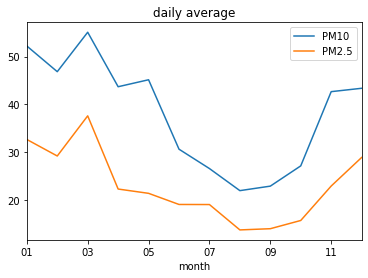

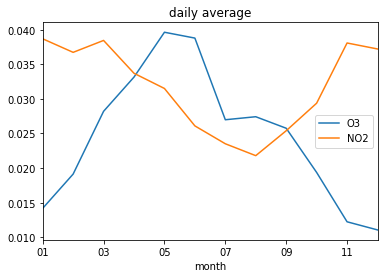

In [21]:
df_month.plot(x='month', y=['PM10','PM2.5'], title = "daily average") 

df_month.plot(x='month', y=['O3','NO2'], title = "daily average") 

__가질 수 있는 insight__

결과를 통해 10월 부터 상승하며 5월부터 내려가는 것을 파악할 수 있다.  
추가로 pm과 no는 비슷한 추세이지만, o3의 경우 역으로 움직이는 것을 파악 할 수 있다.  
o3는 오존으로 햇빛이 강한날에 생성이 더 잘되는 특징을 가지기 때문에 여름철에 높다.

반대로 pm과 no가 겨울철에 높은 이유는 크게 두 가지 이유이다.  
첫번째로 북서풍으로 인한 대륙미세먼지가 우리나라 쪽으로 온다. 하지만 겨울에 높은 이유는 무엇일까?  
두번째는 겨울에는 대류가 느려진다. 기압차로 인해서 미세먼지가 흩어지지 않는다. 이러한 이유로 겨울철에는 미세먼지가 심한 것이다.

### 시간별 시각화

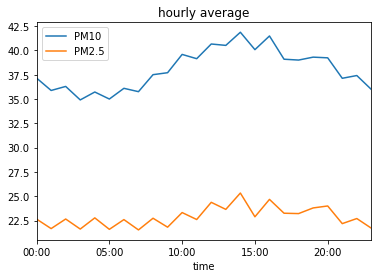

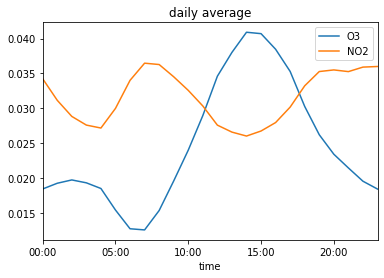

In [22]:
df_time = df.groupby(['time'], as_index=False).agg({ 'NO2':'mean', 
                                                             'O3':'mean',  'PM10':'mean', 'PM2.5':'mean'})
df_time.head()
df_time.plot(x='time', y=['PM10','PM2.5'], title = "hourly average") 
df_time.plot(x='time', y=['O3','NO2'], title = "daily average") 

__insight__ 

위의 모습을 통해 겨울 기간동안 미세먼지의 농도가 더 높으며, 시간의 경우 10 - 16시의 경우 더 높은 미세먼지 농도를 확인할 수 있다.  
하지만 특이점은 no2는 시간에 별 연관성이 없다.
no2의 발생원인 자동차와 파워 플랜트와 같은 고온 연소공정과 화학물질 제조공정 등이 있으며,   
토양중의 세균에 의해 생성되는 자연적 현상 등이 있다.

그리고 no2는 pm발생에 영향을 준다고 하는데 관측상에는 특별한 의미가 없다.

결론적으로 말하자면 pm과 o3는 사람이 많고 날이 따뜻해지는 낮시간대에 높고 
no2는 특별히 시간과의 연관성이 없다.

### Correlation 파악

In [23]:
df_cor = df.corr()  # Pearson correlation
df_cor

,NO2,O3,PM10,PM2.5
NO2,1.000000,-0.448493,0.427216,0.447548
O3,-0.448493,1.000000,0.031921,-0.018026
PM10,0.427216,0.031921,1.000000,0.837464
PM2.5,0.447548,-0.018026,0.837464,1.000000


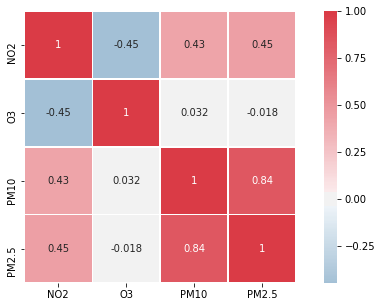

In [24]:
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
heat = sns.heatmap(df_cor, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.3)
heat.get_ylim()
heat.set_ylim(4,0) # heatmap 짤림 현상으로 인해 y축 길이 확대
heat

__insight__   
O3는 여름철에 더 높기 때문에 시간과는 무관하게 상관관계가 -0.45이다  
NO2와 PM은 시간대별로는 별로 상관없는것처럼 보였지만, 1년이라는 거시적인 기간으로 보았을 때는   
0.43정도는 상관관계가 있다는 것을 알 수 있다.

### 앞선 특징을 통한 추가적인 분석

마지막으로 추출해볼 것은 미세먼지가 안좋은 날의 수다.  
day를 평균으로 했을 때, 20시에서 10시까지는 낮은 수치이다. 우리가 활동하는 시간대를 기준으로 평균을 내주어야한다.

In [25]:
df.dtypes # time은 object이다 다시 나눠서 시간대로 바꾸고 그것을 숫자형으로 변환하여 11~ 19시까지만 가져온다

NO2      float64
O3       float64
PM10     float64
PM2.5    float64
date      object
time      object
month     object
dtype: object

In [26]:
date_time = df['time'].str.split(":", n=2, expand=True) # TIME을 다시 시간으로 나눠준다
df['hour'] = date_time[0]
df.head()

,NO2,O3,PM10,PM2.5,date,time,month,hour
0,0.059,0.002,73.0,57.0,2017-01-01,00:00,01,00
1,0.058,0.002,71.0,59.0,2017-01-01,01:00,01,01
2,0.056,0.002,70.0,59.0,2017-01-01,02:00,01,02
3,0.056,0.002,70.0,58.0,2017-01-01,03:00,01,03
4,0.051,0.002,69.0,61.0,2017-01-01,04:00,01,04


In [27]:
df['hour'] = df['hour'].astype(int) # 시간을 기준으로 나누기 위해 SPLIT시 변한 object에서 int형으로 변환

In [28]:
df.loc[(10< df['hour']) & (df['hour'] < 21)] # 일별로 11시부터 20시까지 데이터만 가지고 온다.

,NO2,O3,PM10,PM2.5,date,time,month,hour
11,0.048,0.005,83.0,74.0,2017-01-01,11:00,01,11
12,0.054,0.005,93.0,79.0,2017-01-01,12:00,01,12
13,0.050,0.007,94.0,79.0,2017-01-01,13:00,01,13
14,0.055,0.008,93.0,78.0,2017-01-01,14:00,01,14
15,0.056,0.008,87.0,69.0,2017-01-01,15:00,01,15
...,...,...,...,...,...,...,...,...
25897,0.020,0.020,30.0,19.0,2019-12-31,16:00,12,16
25898,0.025,0.016,27.0,18.0,2019-12-31,17:00,12,17
25899,0.026,0.014,25.0,19.0,2019-12-31,18:00,12,18
25900,0.026,0.014,26.0,19.0,2019-12-31,19:00,12,19


In [29]:
# groupby를 통해 일별 평균
df_day2 = df.groupby(['date'], as_index=False).agg({ 'NO2':'mean', 
                                                             'O3':'mean',  'PM10':'mean', 'PM2.5':'mean'})
df_day2.head()


,date,NO2,O3,PM10,PM2.5
0,2017-01-01,0.054250,0.003125,81.666667,67.291667
1,2017-01-02,0.046250,0.016375,112.166667,87.166667
2,2017-01-03,0.046750,0.013875,72.916667,51.833333
3,2017-01-04,0.058167,0.008750,51.125000,34.916667
4,2017-01-05,0.041333,0.011000,34.875000,21.958333


In [30]:
pol_rule # pm10를 기준으로 종로구의 미세먼지 농도의 정도에 대한 bar 그림을 그린다.


,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [31]:
df_day2.loc[df_day2['PM10'] <= pol_rule.iloc[4,3], 'PM10_class'] = 0
df_day2.loc[(df_day2['PM10'] > pol_rule.iloc[4,3]) & (df_day2['PM10'] <= pol_rule.iloc[4,4]), 'PM10_class'] = 1
df_day2.loc[(df_day2['PM10'] > pol_rule.iloc[4,4]) & (df_day2['PM10'] <= pol_rule.iloc[4,5]), 'PM10_class'] = 2
df_day2.loc[(df_day2['PM10'] > pol_rule.iloc[4,5]), 'PM10_class'] = 3
df_day2['PM10_class'] = df_day2['PM10_class'].astype(int)
df_day2.head()

,date,NO2,O3,PM10,PM2.5,PM10_class
0,2017-01-01,0.054250,0.003125,81.666667,67.291667,2
1,2017-01-02,0.046250,0.016375,112.166667,87.166667,2
2,2017-01-03,0.046750,0.013875,72.916667,51.833333,1
3,2017-01-04,0.058167,0.008750,51.125000,34.916667,1
4,2017-01-05,0.041333,0.011000,34.875000,21.958333,1


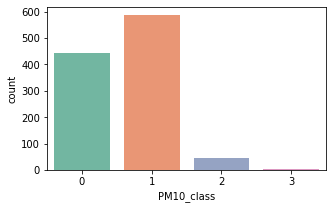

In [32]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_day2, x='PM10_class', 
              palette='Set2', )

In [33]:
df_day2['PM10_class'].value_counts() # 51의 날짜가 미세먼지가 나쁨 이상이었다.

1    589
0    445
2     47
3      4
Name: PM10_class, dtype: int64

In [34]:
a = df_day2['PM10_class'].value_counts()
print("3년간 미세먼지일 확률은", (a[2]+a[3])/sum(a)*100)

3년간 미세먼지일 확률은 4.700460829493087


In [35]:
# 미세먼지가 나쁨인 날만 모으기
df_day3 =df_day2.loc[(df_day2['PM10_class'] == 2) | (df_day2['PM10_class']==3) ]

In [36]:
# 미세먼지 농도가 나쁜 날 중 다시 월별로 모은다.
date_time = df_day3['date'].str.split("-", n=2, expand=True)
df_day3['month'] = date_time[1]
df_day3['month'].value_counts()


03    16
01    13
05     6
12     5
11     4
02     4
04     3
Name: month, dtype: int64

Text(0.5, 1.0, 'monthly bad days')

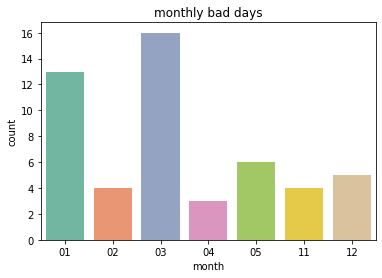

In [37]:
# 월별로 미세먼지 안좋은 날의 수
sns.countplot(data=df_day3, x='month', 
              palette='Set2', )
plt.title("monthly bad days") 

In [38]:
print("10~5월 중 미세먼지가 안좋을 확률은",df_day3.shape[0]/210*100)

10~5월 중 미세먼지가 안좋을 확률은 24.285714285714285


### 결론 

* 월별로 따지면 10 ~ 5월이 미세먼지 농도가 높다.  


* 시간별로 따지면 10~8시 사이가 미세먼지가 높다.  


* 미세먼지 PM10이 안좋을 확률은 년 중 5%정도 된다. 하지만 그것이 11~5월로 한정한다면 25%로 매우 높다.  


* 세부 지표 인사이트
 1. 6가지의 지표 중에 SO2와 CO는 나쁠 경우가 거의 없다.
 2. O3의 경우 다른 지표와 다르게 여름에 더 높다.
 3. NO2는 시간대랑 별 상관이 없지만 미세먼지 농도 PM과는 상관성이 있다.
